# Codifica tus própios perceptrones para implementar puertas lógicas
En las partes que aparecen así
```python
pass  # ⬅️✏️
```
necesitas rellenar código antes de pasar a la siguiente celda.

Revisa las transparencias de clase para llevar a cabo estos ejercicios.

### Comenzaremos por implementar una **neurona AND**. Ojo!! No la vamos a entrenar, vamos a asumir que conocemos los pesos (los hemos calculado en clase) 

Para ello:

1) suponemos que el entrenamiento ya está previamente hecho y por lo tanto conocemos los pesos apropiados (consultar las transparencias)

2) Nos piden implementar la neurona AND y probar con un item o ejemplo, por ejemplo un vector de input 0,1 que la salida es correcta

Recordad que en clase hemos descubierto que los pesos apropiados son:
0.66 y 0.8, así que el vector de pesos será [0.66,0.8] y el bias será 1 y el peso para el bias será -0.97

In [2]:
# Definir dos vectores (listas): input my_x, pesos my_w
my_x = [0, 1]#input un item
my_w = [0.66, 0.80]

In [3]:
# Multiplicar dos vectores elemento a elemento
def mul(a, b):
    """
    devolver una lista c, de la misma longitud que a y b donde 
    cada elemento c[i] = a[i] * b[i]
    lo podéis hacer con un bucle o con una list comprenhension
    """
    c = [0] * len(a)
    for i in range(0, len(a)):
        c[i] = a[i] * b[i]
    
    return c

In [4]:
# Test la función mul() con un item my_x 
# y los pesos descubiertos en clase my_w, el resultado debería ser 
# el vector [0.0,0.8]
mul(my_x, my_w)

[0.0, 0.8]

In [5]:
# Define el bias my_bias y el peso descubierto en clase asociado a ese bias
# añadiré el bias a el vector de pesos my_w generando un nuevo vector my_wPlusWBias.
# Posibles errores: Recordad que en Python las variables con punteros
# y el insertar si lo ejecutáis varias veces los valores 
# se van acumulando dependiendo de cómo hagáis la inserción
# my_wPlusWBias debería contener [-0.97, 0.66, 0.8]. Pista para hacer copias de un vector. copiaV=v[:] o copiaV=v.copy()

my_bias  = 1
my_wbias = -0.97

my_wPlusWBias = [my_wbias] + my_w.copy()

my_wPlusWBias

[-0.97, 0.66, 0.8]

In [6]:
# Neurona lineal
def distanciaDelCoseno(x, weights, bias):
    """
    El producto escalar (producto punto) de dos vectores y la similitud de coseno no son completamente equivalentes 
    ya que la similitud del coseno solo se preocupa por la diferencia de ángulo, 
    mientras que el producto de punto se preocupa por el ángulo y la magnitud
    Pero en muchas ocasiones se emplean indistintamente
    Así pues, esta función devuelve el valor escalar de la neurona, es decir, 
    el producto escalar entre el vector de entrada añadiendo el bias y el vector de los pesos
    recordad que "sum(list)" computa la suma de los elementos de una lista
    Así pues se comenzará por añadir el bías en la posición 0 del vector de entrada 
    antes de llevar a cabo el producto escalar para así tener dos vectores de 
    la misma longitud. Emplea la función mul que ya has programado
    """

    new_x = [bias] + x.copy()
    m = mul(new_x, weights)
    
    return sum(m)

In [7]:
# Test distanciaDelCoseno que debería darte -0.16999999999999993 para los datos my_x, my_wPlusWBias, my_bias
distanciaDelCoseno(my_x, my_wPlusWBias, my_bias)

-0.16999999999999993

In [8]:
# Una neurona perceptron completa, distancia del coseno y activación
def neuron(x, weights, bias):
    """
    Devolverá el output de una neurona clásica 
    (reutilizar la distancia del coseno definida previamente) 
    y añadir la función de activación (step function): si >=0 entonces 1 sino -1
    """

    # Distancia coseno
    dist = distanciaDelCoseno(x, weights, bias)

    # Función de activación
    output=-1
    if dist >= 0:
        output = 1
    
    return output
    

In [9]:
# Testar la función neuron() para el item my_x y el bias my_b 
# y el vector de pesos my_wPlusWBias
# debería de dar -1 para el input item [0,1] con el bias 1 
# y el vector de pesos hayado en clase
neuron(my_x, my_wPlusWBias, my_bias)

-1

In [10]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Devuelve x1 AND x2 suponiendo que la hemos entrenado
    y que en ese entrenamiento hemos aprendido los pesos apropiados 
    (mirar las transparencias de clase). Así pues inicializaremos 
    una la variable local and_w con los pesos aprendidos 
    y a 1 la variable local and_bias 
    y ejecutaremos la función neurona para el item x"""
    and_w    = [-0.97,0.66, 0.80] #initialization of the weights and_w
    and_bias = 1 #initialization of the bias and_bias

    return neuron(x, and_w, and_bias)

Ahora nos piden probar la puerta para toda la colección de inputs posibles

In [11]:
# Se definen los items de entrada para testar
# las neuronas AND y las posteriores que implementaremos (OR, XOR)
# CUIDADO para la neurona NOT hará falta otra colección dado 
# que los vectores de entrada a la NOT no tienen dos dimensiones sino 1
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [12]:
# Para los items de entrada my_x_collection la salida debería ser 
# -1, -1, -1, 1
print('Testando el output de la neurona AND')
#bucle para ir obteniendo el output de la neurona AND para cada item del input
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Testando el output de la neurona AND
[0, 0] -1.000
[0, 1] -1.000
[1, 0] -1.000
[1, 1] 1.000


### Neurona OR

Hasta ahora solo habéis tenido que implementar la neurona AND sin tener que entrenarla dado que ya conocíamos los pesos que habíamos aprendido en clase. Es decir, no habéis implementado en Python la fase de entrenamiento de la neurona para determinar los pesos. Ahora se os pide que entrenéis una neurona OR, de forma que realicéis iteraciones sobre los items del input. Para ello los pasos serán:
1) Inicializar un vector de pesos de forma random (emplear la librería random **from random import random**)

2) Por cada item del input aplicar la neurona y si la predicción realizada por la neurona en base a aplicar  la distancia del coseno y la función de activación no es correcta, entonces ajustar los pesos consecuentemente

3) Repetir el paso 2 hasta convergencia (es decir, hasta que todos los items estén correctamente clasificados)

In [13]:
from random import seed
from random import random

#inicializaciones
print('Entrenando una neurona OR hasta convergencia')
notConverge=True
seed(1)# Si queremos que el proceso de inicialización random sea replicable
orWeights= [random() for i in range(3)]#inicializar de forma random el vector de pesos or_weights
print("Imprimiendo los pesos random", orWeights, "\n")
orBias   = 1#inicialización del bias a 1
orGoldOutputs=[-1,1,1,1]#inicialización del Gold Standard o patrón oro, 
# es decir, el output que la neurona OR debería aprender a obtener

#entrenando
numeroVuelta = 0

while notConverge:
    numeroVuelta += 1
    print(f"### Estamos en la vuelta (epoch) {numeroVuelta}")
    
    cambio = False
    for i, x in enumerate(my_x_collection):
        print("Imprimiendo los pesos")
        print(orWeights)
        
        y_pred = neuron(x, orWeights, orBias)
        y_true = orGoldOutputs[i]

        print(f"predictedOutput: {y_pred} Gold: {y_true}")

        if y_pred != y_true:
            cambio = True
            
            # Ajustamos los pesos
            newWeights = orWeights.copy()
            x = [orBias] + x.copy() # Para que no de problemas con el Bias
            for i, w in enumerate(newWeights):
                newWeights[i] = w + y_true * x[i]
                
            orWeights = newWeights
            #orWeights = matrixAverage([newWeights, orWeights])

    if not cambio:
        notConverge = False # Ha convergido
    print() # Linea nueva

Entrenando una neurona OR hasta convergencia
Imprimiendo los pesos random [0.13436424411240122, 0.8474337369372327, 0.763774618976614] 

### Estamos en la vuelta (epoch) 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: -1
Imprimiendo los pesos
[-0.8656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: -1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 1.7637746189766141]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 1.7637746189766141]
predictedOutput: 1 Gold: 1

### Estamos en la vuelta (epoch) 2
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 1.7637746189766141]
predictedOutput: 1 Gold: -1
Imprimiendo los pesos
[-0.8656357558875988, 0.8474337369372327, 1.7637746189766141]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[-0.8656357558875988, 0.8474337369372327, 1.7637746189766141]
predictedOutput: -1 Gold: 1
Imprimiendo l

### Neurona NOT

Ahora implementa el entrenamiento de una neurona NOT

In [14]:
# Se definen los items de entrada para testar
# la neurona NOT. 
# Recordad que los vectores de entrada a la NOT no tienen dos dimensiones sino 1
my_x_collection = [
    [0],
    [1]
]

In [15]:
from random import seed
from random import random


#inicializaciones
print('Entrenando una neurona NOT hasta convergencia')
notConverge=True
seed(1)# Si queremos que el proceso de inicialización random sea replicable
#inicializar de forma random el vector de pesos notWeights
notWeights= [random() for i in range(2)]#inicializar de forma random el vector de pesos or_weights
print("Imprimiendo los pesos random", notWeights, "\n")
notBias   = 1#inicialización del bias a 1
#inicialización del Gold Standard o patrón oro,notGoldOutput. CUIDADO con el número de valores que ponéis 
# es decir, el output que la neurona OR debería aprender a obtener
notGoldOutputs = [1, -1]

#entrenando
numeroVuelta = 0

while notConverge:
    numeroVuelta += 1
    print(f"### Estamos en la vuelta (epoch) {numeroVuelta}")
    
    cambio = False
    for i, x in enumerate(my_x_collection):
        print("Imprimiendo los pesos")
        print(notWeights)
        
        y_pred = neuron(x, notWeights, notBias)
        y_true = notGoldOutputs[i]

        print(f"predictedOutput: {y_pred} Gold: {y_true}")

        if y_pred != y_true:
            cambio = True
            
            # Ajustamos los pesos
            newWeights = notWeights.copy()
            x = [notBias] + x.copy() # Para que no de problemas con el Bias
            for i, w in enumerate(notWeights):
                newWeights[i] = w + y_true * x[i]
                
            notWeights = newWeights
            #notWeights = matrixAverage([newWeights, notWeights])

    if not cambio:
        notConverge = False # Ha convergido
    print() # Linea nueva


Entrenando una neurona NOT hasta convergencia
Imprimiendo los pesos random [0.13436424411240122, 0.8474337369372327] 

### Estamos en la vuelta (epoch) 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327]
predictedOutput: 1 Gold: -1

### Estamos en la vuelta (epoch) 2
Imprimiendo los pesos
[-0.8656357558875988, -0.15256626306276733]
predictedOutput: -1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, -0.15256626306276733]
predictedOutput: -1 Gold: -1

### Estamos en la vuelta (epoch) 3
Imprimiendo los pesos
[0.13436424411240122, -0.15256626306276733]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, -0.15256626306276733]
predictedOutput: -1 Gold: -1



### Weighted average

Ahora implementa el weighted average explicado en las transparencias de clase ¿qué puedes decir acerca de las actualizaciones de los pesos y el número de epochs?

In [16]:
# Se definen los items de entrada para testar
# las neuronas AND y las posteriores que implementaremos (OR, XOR)
# CUIDADO para la neurona NOT hará falta otra colección dado 
# que los vectores de entrada a la NOT no tienen dos dimensiones sino 1
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [17]:
def matrixAverage(m):
    res=list()
    acum=list()
    if len(m) > 0:
        res=[0]*len(m[0])
        for v in m:
            res = [a+b for a,b in zip (res,v)]
        acum=[elem/len(m) for elem in res]
    return acum

In [18]:
matrix=[[2,3,4],[2,3,4],[2,3,4]]
print(matrixAverage(matrix))

[2.0, 3.0, 4.0]


In [19]:
from random import seed
from random import random

#inicializaciones
print('Entrenando una neurona OR hasta convergencia')
notConverge=True
seed(1)# Si queremos que el proceso de inicialización random sea replicable
orWeights= [random() for i in range(3)]#inicializar de forma random el vector de pesos or_weights
print("Imprimiendo los pesos random", orWeights, "\n")
orBias   = 1#inicialización del bias a 1
orGoldOutputs=[-1,1,1,1]#inicialización del Gold Standard o patrón oro, 
# es decir, el output que la neurona OR debería aprender a obtener
weightLength       = len(orWeights) 
#entrenando
numeroVuelta = 0

while notConverge:
    numeroVuelta += 1
    print(f"### Estamos en la vuelta (epoch) {numeroVuelta}")
    
    cambio = False
    for i, x in enumerate(my_x_collection):
        print("Imprimiendo los pesos")
        print(orWeights)
        
        y_pred = neuron(x, orWeights, orBias)
        y_true = orGoldOutputs[i]

        print(f"predictedOutput: {y_pred} Gold: {y_true}")

        if y_pred != y_true:
            cambio = True
            
            # Ajustamos los pesos
            newWeights = orWeights.copy()
            x = [orBias] + x.copy() # Para que no de problemas con el Bias
            for i, w in enumerate(newWeights):
                newWeights[i] = w + y_true * x[i]
                
            #orWeights = newWeights
            orWeights = matrixAverage([newWeights, orWeights])

    if not cambio:
        notConverge = False # Ha convergido
    print() # Linea nueva

print("### WEIGHTS FINALES")
print(orWeights)

Entrenando una neurona OR hasta convergencia
Imprimiendo los pesos random [0.13436424411240122, 0.8474337369372327, 0.763774618976614] 

### Estamos en la vuelta (epoch) 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: -1
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: 1

### Estamos en la vuelta (epoch) 2
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: -1 Gold: -1
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[-0.3656357558875988, 0.8474337369372327, 0.763774618976614]
predictedOutput: 1 Gold: 1
Imprimiendo los pes

In [20]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Devuelve x1 AND x2 suponiendo que la hemos entrenado
    y que en ese entrenamiento hemos aprendido los pesos apropiados 
    (mirar las transparencias de clase). Así pues inicializaremos 
    una la variable local and_w con los pesos aprendidos 
    y a 1 la variable local and_bias 
    y ejecutaremos la función neurona para el item x"""
    or_w    = [-0.3656,0.8474, 0.7637]#initialization of the weights and_w
    or_bias = 1#initialization of the bias and_bias
    
    return neuron(x, or_w, or_bias)

In [21]:
# Para los items de entrada my_x_collection la salida debería ser 
# -1, -1, -1, 1
print('Testando el output de la neurona OR')
#bucle para ir obteniendo el output de la neurona AND para cada item del input
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Testando el output de la neurona OR
[0, 0] -1.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


![X-OR](res/xorToLearnWeights.png)

In [22]:
# Combinando una puerta OR y una AND, y aprendiendo el peso que hay que darle a cada una para obtener un XOR 
from random import seed
from random import random

#inicializaciones
print('Entrenando una neurona XOR hasta convergencia')
xorConverge = True
seed(1) # Si queremos que el proceso de inicialización random sea replicable

xorWeights = [random() for i in range(3)] #inicializar de forma random el vector de pesos or_weights
print("Imprimiendo los pesos random", xorWeights, "\n")

xorBias   = -0.5 #inicialización del bias a 0.5
xorGoldOutputs = [-1,1,1,-1] #inicialización del Gold Standard o patrón oro, es decir, el output que la red XOR debería aprender a obtener entrenando
numeroVuelta = 0

while xorConverge:
    numeroVuelta += 1
    print(f"### Estamos en la vuelta (epoch) {numeroVuelta}")
    
    cambio = False
    for i, x in enumerate(my_x_collection):
        print("Imprimiendo los pesos")
        print(xorWeights)
        
        y_pred = neuron([and_neuron(x), or_neuron(x)], xorWeights, xorBias)
        y_true = xorGoldOutputs[i]

        print(f"predictedOutput: {y_pred} Gold: {y_true}")

        if y_pred != y_true:
            cambio = True
            
            # Ajustamos los pesos
            newWeights = xorWeights.copy()
            x = [xorBias] + x.copy() # Para que no de problemas con el Bias
            for i, w in enumerate(newWeights):
                newWeights[i] = w + y_true * x[i]
                
            #xorWeights = newWeights
            xorWeights = matrixAverage([newWeights, xorWeights])

    if not cambio:
        xorConverge = False # Ha convergido
    print() # Linea nueva


Entrenando una neurona XOR hasta convergencia
Imprimiendo los pesos random [0.13436424411240122, 0.8474337369372327, 0.763774618976614] 

### Estamos en la vuelta (epoch) 1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 0.763774618976614]
predictedOutput: -1 Gold: -1
Imprimiendo los pesos
[0.13436424411240122, 0.8474337369372327, 0.763774618976614]
predictedOutput: -1 Gold: 1
Imprimiendo los pesos
[-0.11563575588759878, 0.8474337369372327, 1.2637746189766141]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[-0.11563575588759878, 0.8474337369372327, 1.2637746189766141]
predictedOutput: 1 Gold: -1

### Estamos en la vuelta (epoch) 2
Imprimiendo los pesos
[0.13436424411240122, 0.3474337369372327, 0.7637746189766141]
predictedOutput: -1 Gold: -1
Imprimiendo los pesos
[0.13436424411240122, 0.3474337369372327, 0.7637746189766141]
predictedOutput: 1 Gold: 1
Imprimiendo los pesos
[0.13436424411240122, 0.3474337369372327, 0.7637746189766141]
predictedOutput: 1 Gold: 1
Imprimie

In [23]:
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    xor_w    = [-1.115635755887599, 0.3474337369372327, -0.7362253810233859]
    xor_bias = -0.5
    new_x=list()
    new_x.append(and_neuron(x))
    new_x.append(or_neuron(x))
    return neuron(new_x, xor_w, xor_bias)

In [24]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 1.000
[0, 1] -1.000
[1, 0] -1.000
[1, 1] 1.000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


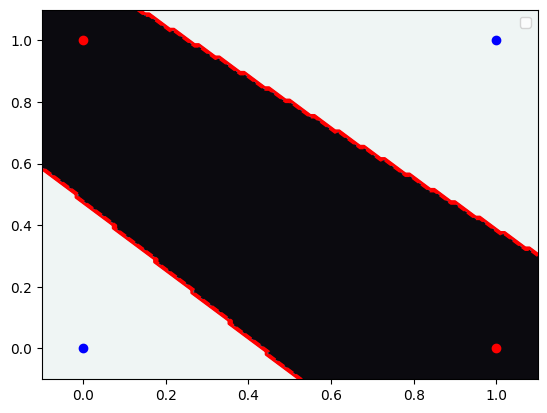

In [59]:
# Graficar funcion resultante XOR
import matplotlib.pyplot as plt
import numpy as np

# Graficamos la funcion XOR
x = y = np.arange(-0.1, 1.1, 0.01)
X, Y = np.meshgrid(x, y)

Z = []
for i in range(len(X)):
    Z.append([])
    for j in range(len(X[i])):
        inp = [X[i][j], Y[i][j]]
        out = xor_neuron(inp)
        Z[i].append(out)

# Lo que estamos haciendo es generar un grid con valores xor y buscar el contorno de la
# matriz generada
CS = plt.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
plt.contour(CS, levels=CS.levels[::2], colors='r')

# Graficamos los datos reales
def xorFunction(x1, x2):
    # Funcion XOR para graficar los puntos
    return 0 if x1 == x2 else 1

xorData = [(0, 0), (0, 1), (1, 0), (1, 1)] # Entradas x1 y x2
colors = ["blue", "red"]

for x1, x2 in xorData:
    color = colors[xorFunction(x1, x2)] 
    plt.scatter(x1, x2, color=color, marker="o")


# Mostramos el grafico
plt.legend()
plt.show()